# Introduction

We perform simple diagnostic tests of our MOCHIS software. These include - checking that (our implementation in Python of) the test controls Type I Error; examining the statistical power of our test for certain common alternative hypotheses.

In [1]:
# Setup

import scanpy
import numpy as np
import anndata
import pandas as pd
import matplotlib.pyplot as plt
from main_draft0 import *
import scipy
import statistics

# 2 Type I Error Control

We simulate samples $(X,Y)$, with $X\in\mathbb{R}^k$ and $Y\in\mathbb{R}^n$ and $k\leqslant n$. We draw each element of $X$ and $Y$ from the same distribution to match the null hypothesis. By varying the values of $(k,n)$, we examine the control of Type I Error of MOCHIS. This also allows examination of the numerical performance of the various approximations (e.g., large $n$, large $n$ and $k$) described in the paper. 

In [6]:
# Helper function for getting FPR metrics

def get_FPR(n, # length of y
            k, # length of x
            p, # choice of exponent
            w_vec, # choice of weight vector
            plot = False, n_draws = 1000):
    # Enforce length(w_vec) = k+1
    assert len(w_vec) == k+1, "Length of w_vec must be (k+1)."
    
    # Generate n_draws p-values to computer FPP
    def generate_n_draws(k, n, p, wList):
        x0 = [abs(np.random.normal()) for i in range(k)]
        y0 = [abs(np.random.normal()) for i in range(n)]
        
        return mochis_py(x=x0,
                         p=p, 
                         wList=wList,
                         alternative="two.sided", 
                         approx="chebyshev", 
                         n_mom=100, 
                         y=y0)
   
    p_values_vec = [generate_n_draws(k, n, p, w_vec) for i in range(n_draws)]
    
    # Compute variance of empirical distribution of p-values
    # Should be close to 1/12 
    emp_var = np.var(p_values_vec)
    emp_mean = np.mean(p_values_vec)
    
    # Compute FPP vector (i.e., for each alpha, what's the FPP?)
    alpha_vec = np.linspace(0, 1, 201)
    
    fpp_vec = []
    for alpha in alpha_vec:
        fpp_vec.append(sum(i<=alpha for i in p_values_vec) / len(p_values_vec))
    
    fpp_df = pd.DataFrame(data={'ALPHA':alpha_vec, 'FPP':fpp_vec})
    
    if plot:
        print("Generating plot for (n,k,p) = (", n,", ",k,", ",p,")")
        plt.figure()
        plt.plot(alpha_vec, fpp_vec)
        plt.plot([0, 1], [0, 1], color='black')
        plt.show()
    
    
    # Return fpp_df and emp_var
    return {"EMP_MEAN": emp_mean, "EMP_VAR": emp_var, "FPP_DF": fpp_df}

    
    
    
    
           

## 2.1 Small $\boldsymbol{n}$ and small $\boldsymbol{k}$
## 2.2 Large $\boldsymbol{n}$ and small $\boldsymbol{k}$
## 2.3 Large $\boldsymbol{n}$ and large $\boldsymbol{k}$
Check for Mann-Whitney. 

Generating Mann-Whitney plot for (n,k) = ( 100 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.48739999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49340000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5503999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5028000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5186000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Nor

Normalizing weight vector...
The test statistic for the data is  0.5014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5060000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5431999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5823999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5368000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4682


The test statistic for the data is  0.5252000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4828
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5108
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5334
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.489
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4316000000000001
Sample sizes, n and k, large enough such that k/n > 0;

The test statistic for the data is  0.46440000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.42619999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47540000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4264000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4882
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5368
Sample sizes, n and k, lar

The test statistic for the data is  0.5248000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5444
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5940000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5756000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4430000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4868
Sample sizes, n and k, large 

The test statistic for the data is  0.5817999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.398
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5004000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46780000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5070000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5898
Sample sizes, n and k, large 

The test statistic for the data is  0.4024000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4368000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5036
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4778
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4902
Sample sizes, n and k, large enough such that k/n > 0

The test statistic for the data is  0.5026
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48039999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45999999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4876
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.40119999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.42259999999999986
Sample sizes, n and k, la

The test statistic for the data is  0.4796
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5208
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5202000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5506000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4640000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5358
Sample sizes, n and k, large enough such 

The test statistic for the data is  0.5016000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5274000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5753999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5435999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5686
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46419999999999995
Sample sizes, n 

The test statistic for the data is  0.5528000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5002000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5845999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4961999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43000000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5982
Sample sizes, n 

Generating plot for (n,k,p) = ( 100 ,  50 ,  1 )


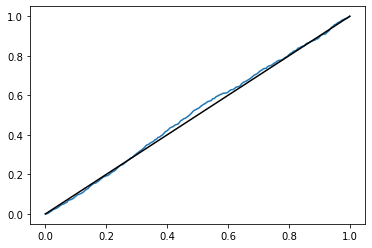

Empirical mean =  0.49243054443871936 . Empirical variance =  0.08115288126066879
Generating Mann-Whitney plot for (n,k) = ( 200 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.3621000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48749999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5781000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5209
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4504000000000001
Sample sizes, n and k, large enough su

The test statistic for the data is  0.5075
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5156999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4525000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48000000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46020000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47830000000000006
Sample sizes, 

The test statistic for the data is  0.5246999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4892000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4446999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4582
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5297999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5049
Sample sizes, n and k, large 

Normalizing weight vector...
The test statistic for the data is  0.5002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4924
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4629
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5350999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48810000000000003
Sample sizes, n and k, 

Normalizing weight vector...
The test statistic for the data is  0.5354
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5339000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5573
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4487
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3955
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4805
Sample sizes, n and k, large enough 

The test statistic for the data is  0.5841000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5344000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48990000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4705
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5104000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44020000000000004
Sample sizes, n

The test statistic for the data is  0.5103
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5128
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5329000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5214000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45050000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41700000000000015
Sample sizes, n and k, larg

The test statistic for the data is  0.5785999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4675
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45570000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5463999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5445999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4541
Sample sizes, n and k, large

Normalizing weight vector...
The test statistic for the data is  0.5109999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5649
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5045
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4578
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4228000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4973000000000001
Sample sizes

The test statistic for the data is  0.4998999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5008999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5262
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49590000000000023
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4968
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5031000000000001
Sample sizes, n and k, large

The test statistic for the data is  0.509
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5315000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.569
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48890000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48560000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5103
Sample sizes, n and k, large enough such 

The test statistic for the data is  0.5387000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5465000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5074
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.576
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43429999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4824000000000001
Sample sizes, n and k, large 

Normalizing weight vector...
The test statistic for the data is  0.5094
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5095999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4882000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5322000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5184
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4818
Sample sizes

The test statistic for the data is  0.4708000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4676000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5063000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5696999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5343999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41590000000000005
Samp

Normalizing weight vector...
The test statistic for the data is  0.4960000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48119999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.6088999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5197999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5657

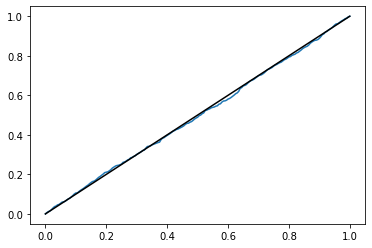

Empirical mean =  0.5028339391341575 . Empirical variance =  0.08551878696266493
Generating Mann-Whitney plot for (n,k) = ( 500 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.45539999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53988
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4538000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5301999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5157599999999999
Sample sizes, n and k, large enough su

The test statistic for the data is  0.45748
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4658000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.62036
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4933600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53804
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5049999999999999
Sample sizes, n and k, large enough su

Normalizing weight vector...
The test statistic for the data is  0.55572
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47236000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48768000000000017
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54556
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46116000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.510080000000

Normalizing weight vector...
The test statistic for the data is  0.5004399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4514
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53864
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.56848
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51468
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5027599999999999
Sample sizes, n and k

Normalizing weight vector...
The test statistic for the data is  0.4221600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5327600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4626400000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5129599999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48527999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

Normalizing weight vector...
The test statistic for the data is  0.54604
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46284000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5020800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47492000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5330400000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54

The test statistic for the data is  0.5265999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5214
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46507999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5122
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4836800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4784
Sample sizes, n and k, large enough such

Normalizing weight vector...
The test statistic for the data is  0.46652000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5046
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5454
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47132
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5235199999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5635599999999997
Sample siz

The test statistic for the data is  0.5024399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47732000000000013
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.58008
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48436
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44928000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4311199999999998
Sample sizes, n and k, la

The test statistic for the data is  0.4781200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5070399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5362000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51384
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5351999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47196000000000005
Sample sizes, n

Normalizing weight vector...
The test statistic for the data is  0.5361199999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43904000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4876399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5150000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5393199999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

The test statistic for the data is  0.4462
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5316000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5231200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47895999999999983
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5577200000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4989599999999999
Sample sizes, n 

Normalizing weight vector...
The test statistic for the data is  0.4759999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48471999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5170000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49655999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48163999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.4704800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43048000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48399999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4714800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5061200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.42515999999999987
Sa

Normalizing weight vector...
The test statistic for the data is  0.47823999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5254000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5588399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43404000000000015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4119200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.4815600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49983999999999984
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.52064
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43180000000000024
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5270799999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51

The test statistic for the data is  0.6256000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46352000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46128000000000013
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4381200000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4606800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44584
Sample sizes, 

Normalizing weight vector...
The test statistic for the data is  0.5048800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5065599999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46892
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49776
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5004000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47024
Sample si

The test statistic for the data is  0.4877199999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4924800000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49424000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45468000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5274399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47912
Sample sizes, 

The test statistic for the data is  0.5284000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41932000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5269199999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47795999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5167999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47704
Sample sizes, 

Normalizing weight vector...
The test statistic for the data is  0.4699200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4384800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.52848
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49079999999999985
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5089600000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.575

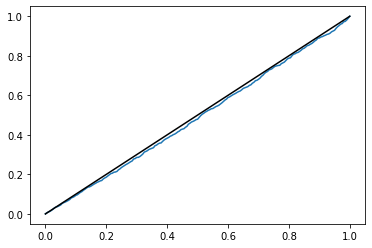

Empirical mean =  0.5131280565859038 . Empirical variance =  0.08407445789796635
Generating Mann-Whitney plot for (n,k) = ( 100 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.5186000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5296000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5163000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46799999999999986
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4805
Sample sizes, n and k, large enough su

The test statistic for the data is  0.5429999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49529999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4242999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5422
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5225999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49510000000000004
Sample sizes, n

The test statistic for the data is  0.49140000000000017
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5172999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4976000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49380000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4559000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46110000000000007
Sa

The test statistic for the data is  0.5181
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4704
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4903
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47890000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49750000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45920000000000016
Sample sizes, n and k, large enough su

The test statistic for the data is  0.4750999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47470000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45920000000000016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5165000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.6242000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49310000000000004
Sa

The test statistic for the data is  0.49810000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5185000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47400000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5119999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4620000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48879999999999996
Sa

The test statistic for the data is  0.48830000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5841000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46280000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5004999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45640000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4805000000000001
Sa

The test statistic for the data is  0.4762
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5706000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5506
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49430000000000013
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4587000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5326999999999998
Sample sizes, n and k, large

The test statistic for the data is  0.48020000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4848999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5137
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5110000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.411
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4365
Sample sizes, n and k, large enough such 

The test statistic for the data is  0.4401999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5919000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5167
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5147999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.486
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44560000000000005
Sample sizes, n and k, large 

The test statistic for the data is  0.5299
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5197999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5392000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.551
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5555
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5484
Sample sizes, n and k, large enough such that k/n > 0;

Normalizing weight vector...
The test statistic for the data is  0.5023000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5412999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5202
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5090000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45940000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5346

Normalizing weight vector...
The test statistic for the data is  0.4501000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5007999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4615000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47400000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4320000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

Normalizing weight vector...
The test statistic for the data is  0.5586
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4931
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4584000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5024
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4508
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5438999999999998
Sample sizes, n and k, l

Normalizing weight vector...
The test statistic for the data is  0.5827000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4709000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5679000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4570000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43259999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

The test statistic for the data is  0.5077999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3959
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4805000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5254
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5036999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46950000000000025
Sample sizes, n and k, large

Normalizing weight vector...
The test statistic for the data is  0.5078
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4674000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4599000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4674000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5072
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48530000000000006

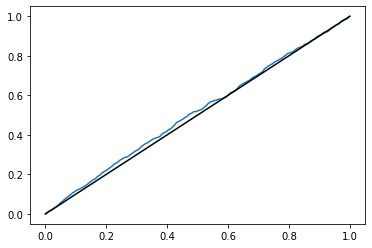

Empirical mean =  0.48683895312094755 . Empirical variance =  0.08573817728602867
Generating Mann-Whitney plot for (n,k) = ( 200 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.5620999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4784000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47230000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4384499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5004500000000002
Sample sizes, n and k, la

The test statistic for the data is  0.43860000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48269999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5175500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5601999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5467499999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5120499999999999
Sam

The test statistic for the data is  0.5156499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49865000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5186
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5073499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5423499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47905
Sample sizes, n and k, larg

The test statistic for the data is  0.4865499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.463
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5348000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5203
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5064
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4981499999999999
Sample sizes, n and k, large enough such t

The test statistic for the data is  0.45725000000000016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5922
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48244999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4966000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5289999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5606
Sample sizes, n and k, larg

The test statistic for the data is  0.48975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5426000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4700500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4559999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46875
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5041999999999999
Sample sizes, n and k, larg

Normalizing weight vector...
The test statistic for the data is  0.4646999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5347000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4393999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51665
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5018
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4216999999999998

The test statistic for the data is  0.5061499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5444
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5399499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48174999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48705000000000015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4632499999999999
Sample sizes, n

The test statistic for the data is  0.47555000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4526999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46454999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5186000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45775000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4631499999999999
Sa

Normalizing weight vector...
The test statistic for the data is  0.5074499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5456499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48839999999999983
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49985000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5465499999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

The test statistic for the data is  0.5560999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5404999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4583499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5287499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4530999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45159999999999995
Samp

The test statistic for the data is  0.4545500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5243000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39225
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49340000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5206999999999997
Sample sizes, n and k, lar

Normalizing weight vector...
The test statistic for the data is  0.48645000000000016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5085999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5279999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5134500000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5019
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4448

The test statistic for the data is  0.47300000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5368999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5125499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5106999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5010499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50185
Sample sizes, n

Normalizing weight vector...
The test statistic for the data is  0.45870000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4787999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5064
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5495
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4929999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.55435
Sample siz

The test statistic for the data is  0.4609
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5630999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4223499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5209999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45909999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5130499999999999
Sample sizes, n 

The test statistic for the data is  0.45314999999999983
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5458999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5106499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49715
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4869
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5035499999999999
Sample sizes, n and k, larg

The test statistic for the data is  0.50015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4794499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5029499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4952500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4843
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4578
Sample sizes, n and k, large enough such

The test statistic for the data is  0.4786499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5633999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5224999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46199999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5222000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5017499999999998
Samp

The test statistic for the data is  0.5586500000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.474
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48329999999999984
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48210000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4233999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4974999999999999
Sample sizes, n 

The test statistic for the data is  0.5383499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48115
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5163999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.55175
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5092499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5885499999999995
Sample sizes, n and k, larg

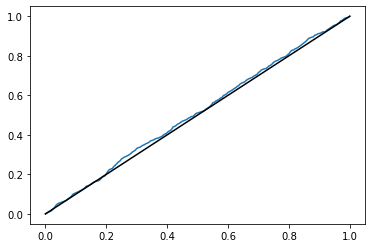

Empirical mean =  0.4884502641215896 . Empirical variance =  0.08268250614577093
Generating Mann-Whitney plot for (n,k) = ( 500 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.5100600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5135
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5467600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5599600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54514
Sample sizes, n and k, large enough such that k/n 

The test statistic for the data is  0.50284
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5036599999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50558
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45712
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5018399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5341999999999998
Sample sizes, n and k, large enough su

The test statistic for the data is  0.5195799999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46621999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5128399999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46266000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4889800000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49758000000000013
Sa

The test statistic for the data is  0.5385199999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49296
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5133000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49932
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5192400000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5153000000000002
Sample sizes, n and k, larg

Normalizing weight vector...
The test statistic for the data is  0.5080999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5357
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5039800000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4778400000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4987999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51402

The test statistic for the data is  0.5030399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5083399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53556
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5488399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49061999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46773999999999977
Sample sizes, 

The test statistic for the data is  0.48721999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5015399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49204000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49607999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5302600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5354600000000004
Sa

Normalizing weight vector...
The test statistic for the data is  0.49540000000000034
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5248599999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50812
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5680799999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48464000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49

The test statistic for the data is  0.5035599999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.53402
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5516600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4704800000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5278000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5106599999999998
Sample sizes, n 

The test statistic for the data is  0.5019799999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5053599999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46368000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44786000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5359399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49080000000000024
Sa

The test statistic for the data is  0.5481
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5480600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5017800000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4504000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4325600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5528200000000002
Sample sizes, n a

The test statistic for the data is  0.5665399999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5351800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48705999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48924000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43632000000000015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4630000000000001
Sa

The test statistic for the data is  0.5370800000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46713999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5052399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5106200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5047
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5591999999999998
Sample sizes, n 

The test statistic for the data is  0.5218000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5081999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4877800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5260199999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5104600000000002
Sample sizes, n 

The test statistic for the data is  0.53676
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4489200000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48932000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5465799999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4929600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5305599999999998
Sample sizes, n

Normalizing weight vector...
The test statistic for the data is  0.43451999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5067600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47774
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5157600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49452000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54

The test statistic for the data is  0.4462000000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5065599999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5348399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5286599999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4740999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48824
Sample sizes, n 

Normalizing weight vector...
The test statistic for the data is  0.48942
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5090799999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5056600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5186200000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4759200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4432

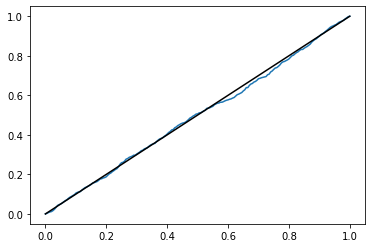

Empirical mean =  0.5045839400441607 . Empirical variance =  0.08543909434183286
k exceeds n, skipping...
Generating Mann-Whitney plot for (n,k) = ( 200 ,  200 )
Normalizing weight vector...
The test statistic for the data is  0.4868749999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5543500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5105499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5326749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49655
Sample sizes,

The test statistic for the data is  0.5056999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4631999999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.542675
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48510000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49200000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5736749999999998
Sample sizes,

The test statistic for the data is  0.4809750000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4811749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4764499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5219
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5023749999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4947999999999999
Sample sizes, n a

Normalizing weight vector...
The test statistic for the data is  0.4772500000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4260999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4705000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4753000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4919499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

Normalizing weight vector...
The test statistic for the data is  0.4644250000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5082249999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5190249999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5103500000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5136249999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

The test statistic for the data is  0.47035000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5188250000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.455525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5211749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5344
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4562249999999998
Sample sizes, n and k, lar

Normalizing weight vector...
The test statistic for the data is  0.504975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.499025
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49765000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.463075
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5310500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51405
Sample sizes, n 

The test statistic for the data is  0.5111249999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4686749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4768250000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.534475
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5127000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.512375
Sample sizes, n and k, la

The test statistic for the data is  0.4803
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5984500000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50915
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51715
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.434575
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5115749999999999
Sample sizes, n and k, large enough such that k/n

The test statistic for the data is  0.5088749999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4833749999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.509575
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.466425
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.528825
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5277250000000003
Sample sizes, n and k, large enough

Normalizing weight vector...
The test statistic for the data is  0.5056499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5358
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51205
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48845
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5369249999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5043749999999998
Sample siz

The test statistic for the data is  0.4674500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5091999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46127499999999977
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5183750000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4995999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47167500000000023
Sam

The test statistic for the data is  0.505025
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48152499999999987
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51245
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5557
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4846749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4993999999999999
Sample sizes, n and k, large enough s

The test statistic for the data is  0.5302250000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5442
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5141250000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5514
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5047750000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.519625
Sample sizes, n and k, large enough suc

The test statistic for the data is  0.467525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5274500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4976499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.493425
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5265249999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44645
Sample sizes, n and k, large enough 

The test statistic for the data is  0.5653500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5135749999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48287500000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4937
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5667749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.499275
Sample sizes, n and k, lar

Normalizing weight vector...
The test statistic for the data is  0.5086000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5029500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5099249999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.519375
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4693499999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.516

Normalizing weight vector...
The test statistic for the data is  0.5068499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49644999999999995
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48814999999999986
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45732499999999987
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5437999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.5227749999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5209749999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47884999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5213
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5320750000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5279750000000001
Sample sizes, n 

The test statistic for the data is  0.4724999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.44347500000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5149500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5579750000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5274499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4681749999999998
Samp

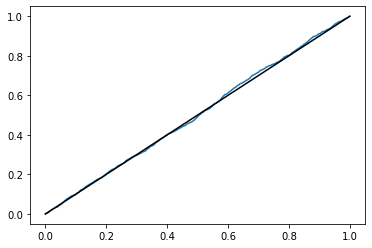

Empirical mean =  0.49649348546971406 . Empirical variance =  0.08128184710000495
Generating Mann-Whitney plot for (n,k) = ( 500 ,  200 )
Normalizing weight vector...
The test statistic for the data is  0.5150900000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49675999999999976
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5270899999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5140399999999999
Sample sizes, n and k, large enough 

Normalizing weight vector...
The test statistic for the data is  0.5081799999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51046
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5071999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49996999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49795000000000017
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47

The test statistic for the data is  0.4713600000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5235799999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5092599999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5167900000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48510000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5475800000000001
Samp

The test statistic for the data is  0.48845000000000033
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5147199999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49386000000000013
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47085000000000016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5045000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5261599999999999
Sa

The test statistic for the data is  0.48074
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4701399999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54454
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49565999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5106700000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5245299999999999
Sample sizes, n and k, lar

The test statistic for the data is  0.48784
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4886500000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4901500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50458
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4690699999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5049700000000001
Sample sizes, n and k, larg

The test statistic for the data is  0.49143000000000014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5224899999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47847999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4921600000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4906699999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51841
Sample sizes, 

The test statistic for the data is  0.48360000000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51812
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5259800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4980900000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5153999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5046199999999997
Sample sizes, n

The test statistic for the data is  0.5244000000000004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5310999999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5337499999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4443899999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.50347
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5197899999999999
Sample sizes, n 

The test statistic for the data is  0.47359000000000007
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5243500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5171799999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4976200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5073499999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49032000000000003
Sam

The test statistic for the data is  0.48863999999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5698599999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4725
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5060200000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51856
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48958
Sample sizes, n and k, large enough su

The test statistic for the data is  0.5362800000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5165099999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4875000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4987000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5026899999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5147199999999998
Sampl

The test statistic for the data is  0.5114899999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48458999999999997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5143499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4919200000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49792999999999993
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5281700000000005
Sam

The test statistic for the data is  0.5049900000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4523800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5140299999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5444399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51481
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5136000000000002
Sample sizes, n 

The test statistic for the data is  0.46652000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5473599999999996
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5012500000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4886800000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51691
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49740000000000023
Sample sizes, 

The test statistic for the data is  0.5195000000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4929
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54503
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5268299999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4842100000000001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47909
Sample sizes, n and k, large enough suc

The test statistic for the data is  0.50089
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51099
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5061899999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47447
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5365099999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5179799999999997
Sample sizes, n and k, large enough su

The test statistic for the data is  0.51933
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.46457999999999994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49881999999999976
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4829200000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5065300000000003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49354
Sample sizes, n and k, la

Normalizing weight vector...
The test statistic for the data is  0.5074399999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4747199999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48582
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.48599
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.54986
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49768999999999974
Sample s

The test statistic for the data is  0.4969
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5012199999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5038799999999998
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49622000000000005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5027200000000002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.52347
Sample sizes, n and k, larg

The test statistic for the data is  0.53195
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.49806000000000006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.51079
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.47152999999999984
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5151499999999999
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.5127900000000002
Sample sizes, n and k, la

Generating plot for (n,k,p) = ( 500 ,  200 ,  1 )


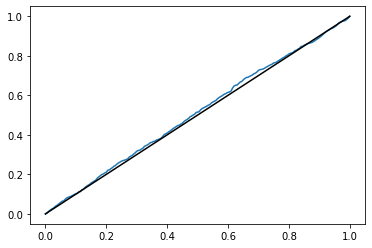

Empirical mean =  0.4901682488901678 . Empirical variance =  0.08398578909926048


In [8]:
# Mann-Whitney
n_vec = [100,200,500]
k_vec = [50,100,200]
diagnostic_list = []



for i in range(len(k_vec)):
    this_k_list = []
    k = k_vec[i]
    wList = [i for i in range(k,-1,-1)]
    for j in range(len(n_vec)):
        n = n_vec[j]
        if k > n:
            print("k exceeds n, skipping...")
        else:
            print("Generating Mann-Whitney plot for (n,k) = (", n,", ",k,")")
            mw_check = get_FPR(n=n, k=k, p=1, w_vec=wList, plot=True)
            print("Empirical mean = ", mw_check["EMP_MEAN"], ". Empirical variance = ", mw_check["EMP_VAR"])
            this_k_list.append(mw_check)
    
    diagnostic_list.append(this_k_list)
            
            
            
            
            
        

## Check for scale shift

Generating Mann-Whitney plot for (n,k) = ( 100 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.2789234909650135
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3770703575547867
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2378316032295271
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36024605920799685
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4132718185313341
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Norm

The test statistic for the data is  0.3329950019223376
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33773164167627845
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3713187235678585
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35492502883506344
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3443752402921953
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29301038062283735
Sa

The test statistic for the data is  0.34800461361015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35972318339100345
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.40795078815840063
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3779315647827759
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38426758938869665
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30426758938869675
Sam

The test statistic for the data is  0.43677047289504045
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31355632449058046
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33053440984236837
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2786159169550173
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2717262591311035
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4415378700499808
Sa

The test statistic for the data is  0.27883121876201467
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3108189158016148
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29510188389081127
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4414455978469819
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.25570165321030375
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3065436370626683
Sa

Normalizing weight vector...
The test statistic for the data is  0.3174317570165321
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.25081122645136483
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29747020376778166
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37377931564782774
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3333948481353326
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.3019607843137255
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3830988081507112
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35181853133410224
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3808842752787389
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.286089965397924
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32890426758938873
Samp

The test statistic for the data is  0.38276047673971547
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30491349480968866
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2694502114571319
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33899269511726254
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3573241061130334
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31226451364859675
S

The test statistic for the data is  0.34311418685121103
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.40819684736639755
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3051595540176856
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35698577470203785
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29894655901576317
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3150019223375624
S

The test statistic for the data is  0.3445905420991927
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37439446366782003
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3754094579008074
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37611687812379857
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3733794694348328
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.329119569396386
Samp

The test statistic for the data is  0.3716878123798538
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34646674356016915
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38743560169165714
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.296639753940792
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4269896193771627
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.24115340253748563
Sam

Generating plot for (n,k,p) = ( 100 ,  50 ,  1 )


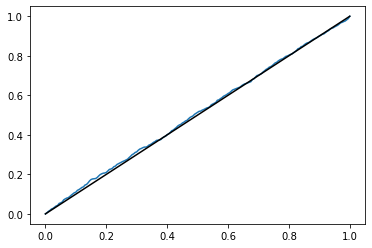

Empirical mean =  0.493457748634253 . Empirical variance =  0.08567754477917251
Generating Mann-Whitney plot for (n,k) = ( 200 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.3369473279507881
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3585082660515186
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30574394463667826
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2904113802383699
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2764475201845444
Sample sizes, n and k, large

The test statistic for the data is  0.29281045751633983
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32316801230296044
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33986928104575165
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.18935793925413308
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2805690119184928
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32493656286043826


The test statistic for the data is  0.3167858515955402
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33274894271434047
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.24741253364090732
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34771241830065364
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2951480199923106
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3246443675509419
Sa

Normalizing weight vector...
The test statistic for the data is  0.42672818146866587
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33404075355632457
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43620146097654744
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31154171472510567
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3267512495194157
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the 

The test statistic for the data is  0.3819300269127258
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27812379853902347
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3402537485582469
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2979008073817762
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31610918877354865
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.380868896578239
Samp

Normalizing weight vector...
The test statistic for the data is  0.38199154171472505
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2796616685890042
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36119953863898496
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36209150326797385
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34897347174163784
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the 

The test statistic for the data is  0.3187081891580161
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3412226066897347
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29545559400230686
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4300499807766242
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3364859669357939
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37980776624375245
Sam

The test statistic for the data is  0.34906574394463674
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3228450595924645
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31677047289504034
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3336716647443291
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.25719338715878515
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3819607843137255
Sa

The test statistic for the data is  0.36444444444444446
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3301191849288736
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2855670895809304
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35630911188004605
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29113417916186085
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3366243752402922
Sa

The test statistic for the data is  0.375517108804306
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30434448289119564
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27704728950403684
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3472510572856594
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2546097654748175
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3298731257208766
Samp

The test statistic for the data is  0.3386851211072665
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.1917416378316032
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.24356785851595542
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3042675893886967
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3733179546328335
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.45407151095732406
Sam

The test statistic for the data is  0.3558938869665513
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3037754709727028
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29560938100730494
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.318077662437524
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.42049980776624374
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2768473663975395
Samp

Normalizing weight vector...
The test statistic for the data is  0.4028758169934641
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33610149942329876
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.40652056901191846
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3150788158400616
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34105344098423673
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.3579084967320262
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3305497885428682
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35240292195309486
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3076201460976548
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3194309880815071
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2831680123029603
Samp

The test statistic for the data is  0.40818146866589766
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3268742791234141
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3015148019992311
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34545174932718176
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28672049211841605
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3188158400615148
Sa

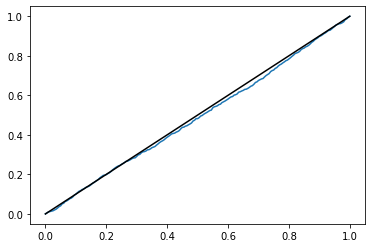

Empirical mean =  0.5108615952475527 . Empirical variance =  0.0852433897216365
Generating Mann-Whitney plot for (n,k) = ( 500 ,  50 )
Normalizing weight vector...
The test statistic for the data is  0.33621837754709727
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32451211072664365
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28495809304113806
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3297777777777777
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3961645520953479
Sample sizes, n and k, lar

Normalizing weight vector...
The test statistic for the data is  0.28563475586312964
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3062114571318723
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28754786620530565
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.316484429065744
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3238600538254518
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

Normalizing weight vector...
The test statistic for the data is  0.30894886582083825
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31227681660899653
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3608858131487888
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3121230296039985
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3810934256055363
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.3332718185313341
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3282029988465975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4023406382160708
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33833448673587085
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.312959630911188
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

The test statistic for the data is  0.3603075740099961
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30810611303344876
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3339976931949251
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38651903114186853
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3587389465590157
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.40160246059207994
Sa

Normalizing weight vector...
The test statistic for the data is  0.33121107266435984
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29085121107266426
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3583760092272203
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35022529796232216
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2399661668589004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

Normalizing weight vector...
The test statistic for the data is  0.3719215686274509
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3754402153018069
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32432756632064597
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3688396770472895
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3843044982698961
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

The test statistic for the data is  0.28986082276047676
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3268927335640138
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3102591311034216
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2870372933487121
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3422283737024222
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33868512110726645
Sam

Normalizing weight vector...
The test statistic for the data is  0.2563783160322953
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2559907727797001
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31691503267973853
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30717108804306037
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4047766243752402
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.34189004229142633
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39734563629373315
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.303117262591311
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2519615532487506
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36405997693194925
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

The test statistic for the data is  0.3223775470972702
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35434678969627054
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28124875048058445
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2985282583621684
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3244259900038447
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3959000384467513
Sam

The test statistic for the data is  0.30248366013071903
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36389388696655145
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30848135332564397
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2800922722029988
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3006935793925412
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2713264129181084
Sa

The test statistic for the data is  0.31310726643598613
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3143744713571703
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3692395232602845
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33618146866589765
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3504775086505191
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3527720107650904
Sam

Normalizing weight vector...
The test statistic for the data is  0.2873387158785083
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4109034986543637
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28468127643214153
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3750157631680123
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3782022299115725
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

Normalizing weight vector...
The test statistic for the data is  0.3247581699346405
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31254133025759323
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29777777777777775
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34809688581314874
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3529996155324877
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.355041906958862
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29085121107266443
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3968412149173393
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2711726259131104
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.319923106497501
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.426718954248366
Sample 

Normalizing weight vector...
The test statistic for the data is  0.31808381391772383
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2805413302575932
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3709188773548635
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3795432525951557
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37116493656286037
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

The test statistic for the data is  0.2752264513648597
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3448735101883891
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28892579777008837
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27929873125720883
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.261926951172626
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3610088427527874
Samp

Normalizing weight vector...
The test statistic for the data is  0.31342714340638217
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36527797001153406
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.25959554017685504
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.23835447904652055
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3059592464436755
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the 

Generating plot for (n,k,p) = ( 500 ,  50 ,  1 )


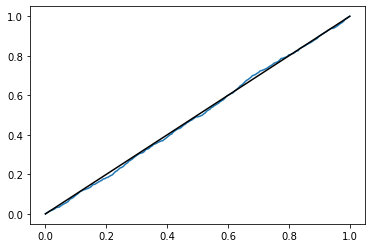

Empirical mean =  0.5039323606833144 . Empirical variance =  0.08085710689249213
Generating Mann-Whitney plot for (n,k) = ( 100 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.27750612685030884
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3531849818645231
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3685324968140378
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.358188412900696
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36668954024115286
Sample sizes, n and k, lar

The test statistic for the data is  0.3163101656700323
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28692481129301045
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.22057837466915012
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3856915988628566
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38561317517890403
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36962258602097825
S

Normalizing weight vector...
The test statistic for the data is  0.27505930791098915
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.316114106460151
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.374586805215175
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37830408783452607
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3300029408881482
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

Normalizing weight vector...
The test statistic for the data is  0.5041741005783746
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3734575041662583
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41481815508283504
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3556239584354476
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.338441329281443
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

The test statistic for the data is  0.30782472306636605
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3608156063131066
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30954220174492697
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3345044603470248
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39463974120184286
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3997686501323398
Sa

The test statistic for the data is  0.392090971473385
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2457994314282914
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35222037055190664
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2981864523085971
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3227252230173513
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2583472208607
Sample s

The test statistic for the data is  0.3443387903146751
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35945103421233215
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30632683070287225
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2776159200078424
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28452504656406225
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35212626213116366
S

Normalizing weight vector...
The test statistic for the data is  0.43365552396823837
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3025075972943828
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3939260856778748
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30549553965297527
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.317988432506617
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

The test statistic for the data is  0.27382805607293403
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2762513479070679
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30527595333790797
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31977649250073525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36816390549946076
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3731359670620526
S

The test statistic for the data is  0.30417802176257236
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3345436721890011
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31783158513871185
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34944417213998613
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30057837466915016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4080737182629155
S

The test statistic for the data is  0.29802176257229684
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32782276247426734
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27765513184981866
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3272110577394373
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41419076561121454
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4072973237917851
S

The test statistic for the data is  0.3128987354180963
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.375723948632487
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38543280070581315
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32257621801784125
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28609352024311346
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3243721203803549
Sam

The test statistic for the data is  0.39366728752083124
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34391530242133117
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2717733555533771
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2948691304774042
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3507381629252034
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35342809528477603
Sa

The test statistic for the data is  0.4087089501029311
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3178707969806882
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35443191843936867
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.41623762376237616
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3983256543476129
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37764532888932456
Sa

The test statistic for the data is  0.3510753847661994
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34164101558670723
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33887265954318196
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3746573865307323
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3045858249191256
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3374139790216645
Sam

The test statistic for the data is  0.27538084501519466
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3663366336633664
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3022723262425252
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31211449857857076
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34386040584256455
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33993922164493673
S

Normalizing weight vector...
The test statistic for the data is  0.39944711302813457
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35779629448093325
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27974904421135177
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3746573865307322
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30240564650524454
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the 

Generating plot for (n,k,p) = ( 100 ,  100 ,  1 )


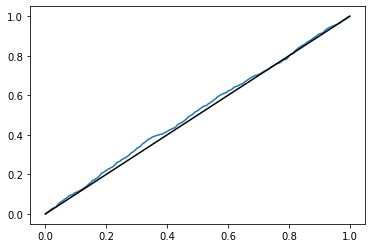

Empirical mean =  0.486464141053793 . Empirical variance =  0.08524514467062082
Generating Mann-Whitney plot for (n,k) = ( 200 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.33384962258602097
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37642584060386247
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3259366728752083
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3372688952063523
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.42561317517890407
Sample sizes, n and k, la

The test statistic for the data is  0.3342887952161553
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33979021664542697
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3497225762180178
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36007058131555736
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30066071953730034
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32622291932163516
S

The test statistic for the data is  0.3807705126948338
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3621174394667189
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3913498676600333
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4132967356141555
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31941966473875105
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3196353298696206
Samp

The test statistic for the data is  0.3388177629644153
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3846524850504854
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33061072443878053
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3498088422703656
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.387679639251054
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3199294186844427
Sampl

The test statistic for the data is  0.31688265856288594
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31700813645721015
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3237290461719439
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3088481521419468
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2962533084991667
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3518831487109107
Sam

The test statistic for the data is  0.26173120282325263
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3781746887560042
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2884070189197137
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.335829820605823
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2874737770806784
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2971591020488187
Sampl

The test statistic for the data is  0.3879658856974806
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27961964513283005
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32329771591020495
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3483187922752672
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3207097343397707
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35483972159592203
Sa

Normalizing weight vector...
The test statistic for the data is  0.4013841780217627
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.26407999215763167
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3586942456621899
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3019507891383197
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.254092736006274
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data

The test statistic for the data is  0.37156357219880404
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3328261935104401
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3100519556906186
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34990295069110877
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34713459464758356
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3074561317517891
Sa

Normalizing weight vector...
The test statistic for the data is  0.29415547495343586
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.24344279972551713
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3616194490736202
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29852759533379075
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4073326144495639
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.37044211351828243
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3099029506911087
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35671796882658574
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3196000392118421
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.26415841584158417
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32517204195667093
S

The test statistic for the data is  0.34405254386824824
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3464405450446034
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28121164591706693
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3076835604352514
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.43264385844525055
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30399372610528375
S

The test statistic for the data is  0.35482795804332906
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30359768650132335
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3195921968434467
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34688756004313304
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28038035486716983
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3451700813645721
S

Normalizing weight vector...
The test statistic for the data is  0.31182433094794626
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39681599843152626
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34214292716400363
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3333477110087245
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3434682874228017
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.30882854622095873
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39543182040976377
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3279913733947652
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3487226742476229
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30834231938045287
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3455778845211255
Sa

The test statistic for the data is  0.3167258111949809
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3577688461915499
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35318890304872075
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3296461131261641
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34178609940201937
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3641799823546712
Sam

The test statistic for the data is  0.2539633369277522
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2938809920596019
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36055288697186555
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3019743162435057
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30624056465052457
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2922733065385747
Sam

Normalizing weight vector...
The test statistic for the data is  0.2824350553867268
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33944123125183806
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37088128614841687
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34138221742966374
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34396627781590033
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the 

The test statistic for the data is  0.2814390746005293
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28579551024409383
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33733555533771203
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3433898637388493
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3085579845113225
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34426036663072235
Sa

The test statistic for the data is  0.39398882462503676
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2962180178413881
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3491775316145475
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3650504852465444
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.282780119596118
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30913439858837377
Samp

The test statistic for the data is  0.30368003136947364
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30914616214096646
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2950259778453094
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3052092932065484
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3362493873149691
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3155455347514949
Sam

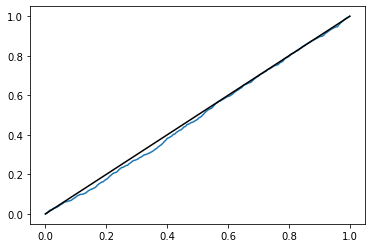

Empirical mean =  0.511927463919574 . Empirical variance =  0.07988833277035971
Generating Mann-Whitney plot for (n,k) = ( 500 ,  100 )
Normalizing weight vector...
The test statistic for the data is  0.4174312322321341
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37601725321046947
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35529301048916767
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35681442995784723
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32999353004607385
Sample sizes, n and k, l

The test statistic for the data is  0.3133284972061562
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.345384962258602
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3338394275071071
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38693226154298593
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3069997059111852
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3533763356533674
Sampl

The test statistic for the data is  0.24357219880403883
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3530061758651113
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35740731300852857
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3264095676894421
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3487728654053523
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3025264189785315
Sam

The test statistic for the data is  0.2922215469071659
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3046736594451525
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3599419664738749
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31774688756004316
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3438306048426624
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31671953730026475
Sam

The test statistic for the data is  0.3420378394275072
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2990130379374572
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34135869032447813
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39227761984119214
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32562376237623764
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27265013233996677
S

The test statistic for the data is  0.3411594941672385
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2954133908440349
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3465048524654446
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33680227428683457
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3120203901578278
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3172700715616117
Samp

The test statistic for the data is  0.290259386334673
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3552632094892658
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35321164591706694
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37136516027840405
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39422566415057364
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34511204783844723
Sa

Normalizing weight vector...
The test statistic for the data is  0.3136625820997942
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31726850308793264
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32246485638662886
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32354867169885304
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2830789138319772
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

Normalizing weight vector...
The test statistic for the data is  0.3620186256249386
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2785836682678169
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3238984413292814
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28527948240368606
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31790530340162726
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.36698127634545624
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.25032447799235363
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3633565336731692
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3808089402999706
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3241148906969905
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.3251689050093129
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3254920105871975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3374610332320361
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3029373590824429
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.342158611900794
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data 

Normalizing weight vector...
The test statistic for the data is  0.3641407705126947
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3661891971375355
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3196729732379179
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31457072835996475
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3667663954514263
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the dat

Normalizing weight vector...
The test statistic for the data is  0.3882748750122537
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30729771591020505
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38937280658758955
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3137347318890305
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3102840897951181
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

The test statistic for the data is  0.2917619841192039
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32962180178413886
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3732551710616605
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30631428291344
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3394827958043329
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3656088618762866
Sample

The test statistic for the data is  0.3509671600823449
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.331562003725125
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3765897461033233
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30460307812959514
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31077345358298203
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3454508381531223
Samp

Normalizing weight vector...
The test statistic for the data is  0.3218955004411331
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33346613077149284
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3118745221056759
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32330712675227913
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3405556318008037
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

Normalizing weight vector...
The test statistic for the data is  0.3033028134496617
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2812610528379572
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35981648857955095
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3320027448289383
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37341044995588674
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

The test statistic for the data is  0.33160592098813835
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3536147436525831
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.318451132241937
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32429997059111854
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33788765807273796
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3163383981962553
Sam

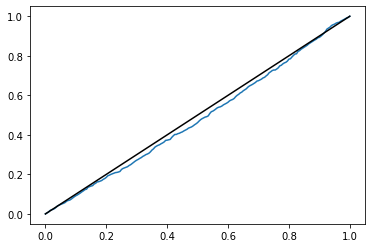

Empirical mean =  0.5188759656853651 . Empirical variance =  0.08213293670347839
k exceeds n, skipping...
Generating Mann-Whitney plot for (n,k) = ( 200 ,  200 )
Normalizing weight vector...
The test statistic for the data is  0.3581604415732284
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29915695156060496
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3369282938541125
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3082468255736244
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3439201999950496
S

The test statistic for the data is  0.3907368629489369
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3511596247617635
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3396430781416302
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3880656419395559
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3385272641766293
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3228870572510581
Sampl

The test statistic for the data is  0.3316898096581767
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3681275215960002
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33134724388010206
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32549788371574967
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3228078512908096
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3333739263879608
Sam

The test statistic for the data is  0.3392797207989901
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3511111111111111
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33759758421821245
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3665839954456573
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3388638895076856
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37117992128907695
Sam

The test statistic for the data is  0.30772010593797183
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39734065988465633
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4000029702235093
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34294596668399285
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3743877626791417
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3523694958045594
Sa

Normalizing weight vector...
The test statistic for the data is  0.34383604366228554
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3451508626024109
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37238583203386055
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3497576792653648
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36261874706071634
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the d

The test statistic for the data is  0.3763580109403234
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36102472711071515
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3517229771540308
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3292987797331749
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32863047944357804
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33898863889507685
Sa

The test statistic for the data is  0.30448652261082637
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36824930075988227
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2761169277988168
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31246454295685766
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35592584341971717
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37710452711566556


The test statistic for the data is  0.39693868963639506
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3602920719784164
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2828365634513997
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3095339224276627
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3565802826662707
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3461052944234055
Samp

The test statistic for the data is  0.3113952624935027
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.27475557535704553
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32249003737531245
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3399272295240217
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3295165961238584
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3461132150194302
Sam

The test statistic for the data is  0.3465359768322567
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32158906957748556
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36649587881488094
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28704636023860786
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3416252072968492
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3680849483923666
Sa

The test statistic for the data is  0.3488883938516374
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31895646147372586
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3366421623227149
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3727699809410659
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34560530679933654
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3251563080121781
Sam

The test statistic for the data is  0.34889235414964975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3392925917675307
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3484349397292147
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29340956907007254
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3117299076755527
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3127734462018266
Sam

The test statistic for the data is  0.29443231603178144
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3322888047325561
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35894161035617933
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.38230835870399255
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33556793148684433
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3477745600356428
S

The test statistic for the data is  0.3338927254275883
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3569753223930101
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2898056978787654
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3250513601148487
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3169327491893766
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2883988020098511
Sampl

The test statistic for the data is  0.30328457216405535
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3821875696146135
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3694928343357838
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3755817925298879
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3523595950595284
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35052894730328454
Sam

The test statistic for the data is  0.3666879532684834
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.337594613994703
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3481339570802703
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3386708249795796
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3460894532313557
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.4020702457859955
Sample

The test statistic for the data is  0.3093220464839979
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30620232172470985
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.281023737036212
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3361570258161926
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2795267443875151
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34171035370411634
Samp

The test statistic for the data is  0.370787851785847
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3390094304596421
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3666146877552536
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28324150392317016
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3443132595727828
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34171431400212876
Samp

Normalizing weight vector...
The test statistic for the data is  0.36223756837702037
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34244300883641493
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2719625751837826
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33853815499616347
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.410228459691592
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the da

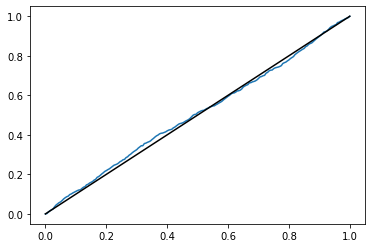

Empirical mean =  0.49559898980171496 . Empirical variance =  0.0886895331963879
Generating Mann-Whitney plot for (n,k) = ( 500 ,  200 )
Normalizing weight vector...
The test statistic for the data is  0.3396147620108415
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36141739065864714
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.346355981287592
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32782693497685705
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3364797901042053
Sample sizes, n and k, lar

The test statistic for the data is  0.3247161208880967
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34246776069899254
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3397102051929406
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32601747481498006
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3471080418801516
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3262935075864458
Sam

The test statistic for the data is  0.3521831637830746
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3546436969381946
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3872159600009902
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32795762481126717
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33378480730674975
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33609366104799404
Sa

The test statistic for the data is  0.34595757530754195
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36501611346253793
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3572424444939482
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34548986411227445
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3708844830573501
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.37349907180515335
S

The test statistic for the data is  0.3105980545036014
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3407632484344448
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3734040246528552
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3274954580332171
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35087824558798053
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3569093834311033
Samp

The test statistic for the data is  0.32718021831142796
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.28972371970990807
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32063899408430474
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3187214177866887
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3532932353159575
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3631864557807972
Sa

The test statistic for the data is  0.36148471572485824
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3252186827058735
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33270721021756894
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3878804980074748
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31558010940323256
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3420574738249053
Sa

The test statistic for the data is  0.3428923046459247
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32846969134427356
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3782474691220515
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32734179847033484
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32234509046805776
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30708962649439386
S

The test statistic for the data is  0.31300274745674606
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32762654389742835
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3258820326229547
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3625246899829212
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33641404915719914
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.322958144600381
Sam

The test statistic for the data is  0.37155416945125125
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.351762580134155
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3077652533353134
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33402242518749553
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3368572065047895
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31790163609811634
Sam

The test statistic for the data is  0.34933016509492343
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35785035023885536
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32087225563723676
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31062894482809855
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3221605405806788
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30985985495408547


The test statistic for the data is  0.2999995049627486
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2918199054478849
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3060088611668029
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34396633746689437
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3469504220192569
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32027464666716193
Sam

The test statistic for the data is  0.2984732061087597
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30244182074701137
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34103017252048207
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30801039578228256
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.320177223336056
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35144615232296245
Sa

The test statistic for the data is  0.37081636593153633
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29960505928071096
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3118455483775154
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31547991386351815
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3608748298309449
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.329883913764511
Sam

The test statistic for the data is  0.3458110442810823
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3261018291626444
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33848964134551107
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3665455805549367
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.39219167842380126
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.313355213979852
Samp

The test statistic for the data is  0.3417291651196753
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.29243018737159965
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34937531249226517
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3033095220415336
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.302413702631123
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3652252171975942
Samp

The test statistic for the data is  0.3145112249696791
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3423089527486944
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.32088888888888883
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30249053241256396
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30174520432662555
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3394381327194872
Sa

The test statistic for the data is  0.30670587361698964
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3840663349917083
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3578634192222966
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3215375857033243
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3714310041830648
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35898061929160163
Sam

The test statistic for the data is  0.33453013539268844
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3137639167347343
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3714127868122074
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35241365312739786
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36650043315759523
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.33201772233360566
S

The test statistic for the data is  0.3646870126977054
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.2815504566718645
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.34192361575208546
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3735747134971907
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3330505680552462
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.30493166010742306
Sam

The test statistic for the data is  0.3908721071260613
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.31924338506472605
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3337277790153711
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.35007272097225317
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.3502152917007004
Sample sizes, n and k, large enough such that k/n > 0; p = 1 or p = 2. Applying Gaussian asymptotics...
Normalizing weight vector...
The test statistic for the data is  0.36698675775352113
Sa

Generating plot for (n,k,p) = ( 500 ,  200 ,  1 )


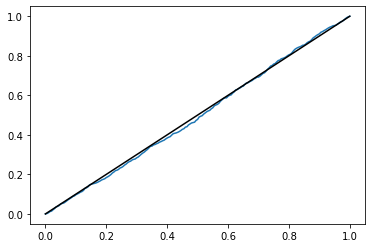

Empirical mean =  0.5052462532307332 . Empirical variance =  0.08023752717713642


In [10]:
# Scale-shift alternative
n_vec = [100, 200, 500]
k_vec = [50, 100, 200]

diagnostic_list = []
for i in range(len(k_vec)):
    this_k_list = []
    k = k_vec[i]
    wList = [(x/(k+1)-0.5)**2 for x in range(1, k+2)]
    
    for j in range(len(n_vec)):
        n = n_vec[j]
        if k > n:
            print("k exceeds n, skipping...")
        else:
            print("Generating Mann-Whitney plot for (n,k) = (", n,", ",k,")")
            mw_check = get_FPR(n=n, k=k, p=1, w_vec=wList, plot=True)
            print("Empirical mean = ", mw_check["EMP_MEAN"], ". Empirical variance = ", mw_check["EMP_VAR"])
            this_k_list.append(mw_check)
    diagnostic_list.append(this_k_list)
            
            